# **Term life insurance call success prediction model**

![telesales](C:\PythonVenv\jupyter_playground\Insurance_photo)

The data for analysis is provided at: https://www.kaggle.com/datasets/aadityatyagi/term-life-insurance-targeting-high-value-customers, which is posted in Sep 2024

Analysis by Binh Nguyen

### **1. Import libraries**

In [1]:
!pip install scikit-learn

In [2]:
!pip install matplotlib

In [3]:
!pip install seaborn

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### **2. Load and prepare data**

In [5]:
# Load dataset
df = pd.read_csv(r"C:\PythonVenv\jupyter_playground\Insurance_CusPre_Dataset.csv")

In [6]:
# check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [7]:
# check null
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [8]:
# Renaming columns to more meaningful names
column_mapping = {
    'age': 'customer_age',
    'job': 'job_type',
    'marital': 'marital_status',
    'education_qual': 'education_level',
    'call_type': 'contact_method',
    'day': 'call_day',
    'mon': 'call_month',
    'dur': 'call_duration',
    'num_calls': 'number_of_calls',
    'prev_outcome': 'previous_campaign_outcome',
    'y': 'subscription_status'
}

# Renaming the columns
df= df.rename(columns=column_mapping)

# Display the first few rows of the renamed dataset
df.head()

,customer_age,job_type,marital_status,education_level,contact_method,call_day,call_month,call_duration,number_of_calls,previous_campaign_outcome,subscription_status
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [63]:
# Map the month column to numerical
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['call_month'] = df['call_month'].astype(str).str.strip().str.lower().map(month_map)

### **3. Describe data (Descriptive)**

#### **Question**: Which customers are called by telesales to sell term life insurance?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\1468536052.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, ax=axs[0], palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\1468536052.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right', fontsize = 8) # rotate the labels
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\1468536052.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, ax=axs[1], palette='viridis')
C:\Users\ADMIN\AppDat

Text(0.5, 0, '')

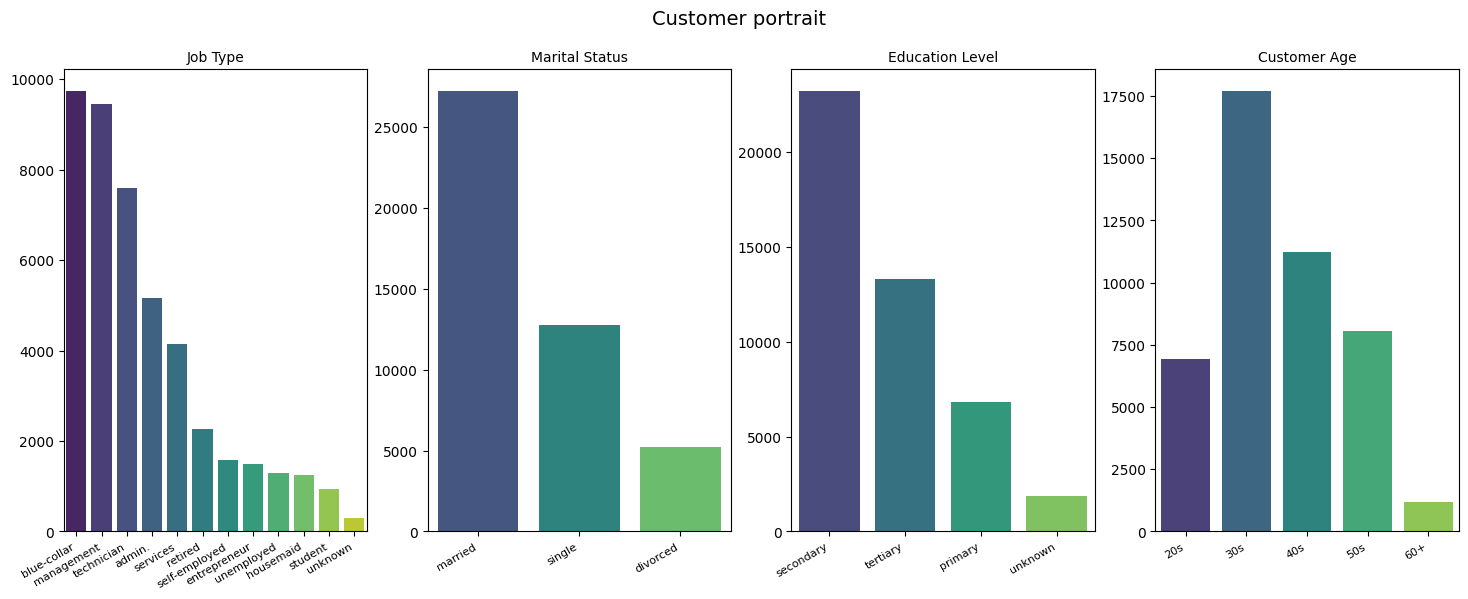

In [62]:
# make 4 blank sub plots
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
fig.suptitle('Customer portrait', fontsize=14)

# Plot 1: Distribution of job_type
job_counts = df['job_type'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts.values, ax=axs[0], palette='viridis')
axs[0].set_title('Job Type', fontsize=10)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=30, ha='right', fontsize = 8) # rotate the labels
axs[0].set_xlabel("")                         #  Hide vertical name

# Plot 2: Distribution of marital_status
status_counts = df['marital_status'].value_counts()
sns.barplot(x=status_counts.index, y=status_counts.values, ax=axs[1], palette='viridis')
axs[1].set_title('Marital Status', fontsize=10)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=30, ha='right', fontsize = 8) # rotate the labels
axs[1].set_xlabel("")                         #  Hide vertical name

# Plot 3: Distribution of education level
edu_counts = df['education_level'].value_counts()
sns.barplot(x=edu_counts.index, y=edu_counts.values, ax=axs[2], palette='viridis')
axs[2].set_title('Education Level', fontsize=10)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=30, ha='right', fontsize = 8) # rotate the labels
axs[2].set_xlabel("")              

# Plot 4: Customer age
temp_df = df.copy()
bin_edges = [20, 30, 40, 50, 60, float('inf')]
bin_labels = ['20s', '30s', '40s', '50s', '60+']
temp_df['age of customer'] = pd.cut(temp_df['customer_age'], bins=bin_edges, labels=bin_labels, right=True)
age_counts = temp_df['age of customer'].value_counts()
sns.barplot(x=age_counts.index, y=age_counts.values, ax=axs[3], palette='viridis')
axs[3].set_title('Customer Age', fontsize=10)
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=30, ha='right', fontsize = 8) # rotate the labels
axs[3].set_xlabel("")   

**Findings:**
- The blue-collar & management are mostly contacted by telesale, following by techinician and admin, service. 
They have the same common, which is **high income from salary**
While student, housemaid, un-employed with no income or low/ fluctuated income like self-emplyed and entrepreneur also has low chance of agreeing to buy insurance.
- The married tend to be called frequently, may be the telesale sell insurance to **protect their family**.
By contrast, single and divored is not called frequently.
- The secondary is called doubled at frequency than tertiary or primary at buying term insurance, which is very unexpected.
- **Customer at their 30s are mostly contacted to introduce of term life insurance.**

#### **Question**: Which customer portrait has highest rate of buying term life insurance?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\871074969.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = temp_df.groupby('age of customer')['subscription_status'].value_counts(normalize=True).unstack()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\871074969.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([category, 'subscription_status']).size().unstack(fill_value=0)


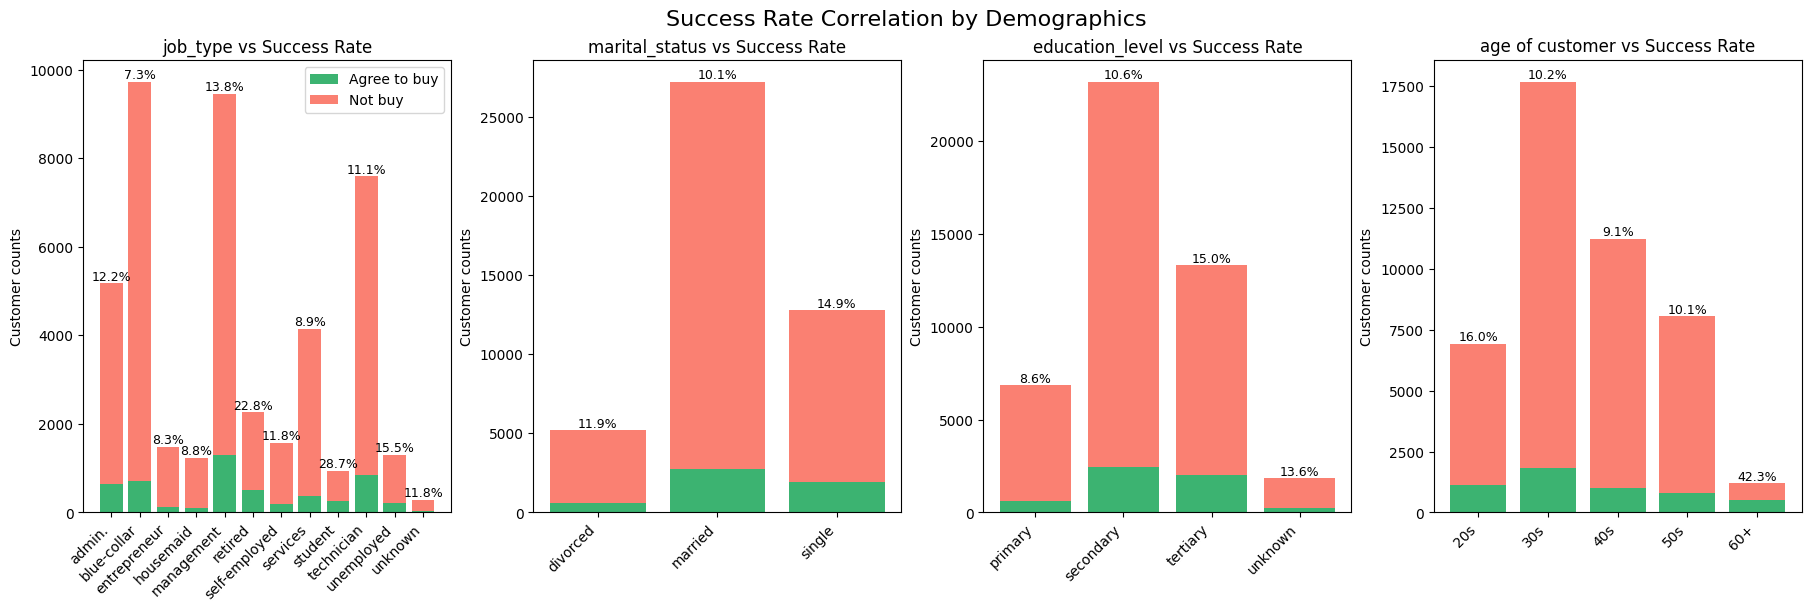

In [51]:
def plot_status_by_category(df, category, ax):
    # group and calculate success rate
    counts = df.groupby([category, 'subscription_status']).size().unstack(fill_value=0)
    counts['total'] = counts.sum(axis=1)
    counts['percent_yes'] = (counts['yes'] / counts['total']) * 100

    # stacked bars
    bars_yes = ax.bar(counts.index, counts['yes'], label='Agree to buy', color='mediumseagreen')
    ax.bar(counts.index, counts['no'], bottom=counts['yes'], label='Not buy', color='salmon')

    # add percentages
    for i, bar in enumerate(bars_yes):
        percent = counts.iloc[i]['percent_yes']
        total_height = counts.iloc[i]['total']
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            total_height + 2,
            f"{percent:.1f}%",
            ha='center', va='bottom', fontsize=9
        )

    ax.set_title(f'{category} vs Success Rate', fontsize=12)
    ax.set_ylabel('Customer counts')
    ax.set_xticks([bar.get_x() + bar.get_width()/2 for bar in bars_yes])
    ax.set_xticklabels(counts.index, rotation=45, ha='right')

# draw all 3 charts on one row
fig, axes = plt.subplots(1, 4, figsize=(18, 6), constrained_layout=True)

plot_status_by_category(df, 'job_type', axes[0])
plot_status_by_category(df, 'marital_status', axes[1])
plot_status_by_category(df, 'education_level', axes[2])

# Plot number of age
temp_df = df.copy()
bin_edges = [20, 30, 40, 50, 60, float('inf')]
bin_labels = ['20s', '30s', '40s', '50s', '60+']
temp_df['age of customer'] = pd.cut(temp_df['customer_age'], bins=bin_edges, labels=bin_labels, right=True)
age_analysis = temp_df.groupby('age of customer')['subscription_status'].value_counts(normalize=True).unstack()

plot_status_by_category(temp_df, 'age of customer', axes[3])

axes[0].legend(loc='upper right')  # Add legend only once if preferred

plt.suptitle('Success Rate Correlation by Demographics', fontsize=16)
plt.show()

**Findings:** 
- Blue-collor, management, technicican have success rate not much higher than other types, even those they are contacted most frequently.
By contrast, **the student, retired have very high success rate, at 23 - 29%, which is very questionable**.
- **Single customer have highest sucess rate, at 15%**, followed by divorced and married.
- **Tertiary (high school or higher education) show higher chance in agree to buy term life insurance**, which may indicate higher education means higher awareness
of financial plan and financial protection.
- **Customer from 60 yo above show higher chance in agree to buy term life insurance than other age group.**

#### **Question:** Which call feature will indicate high chance of success?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\2224560204.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_of_call_analysis = temp_df.groupby('number of calls')['subscription_status'].value_counts(normalize=True).unstack()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\871074969.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby([category, 'subscription_status']).size().unstack(fill_value=0)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\2224560204.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. 

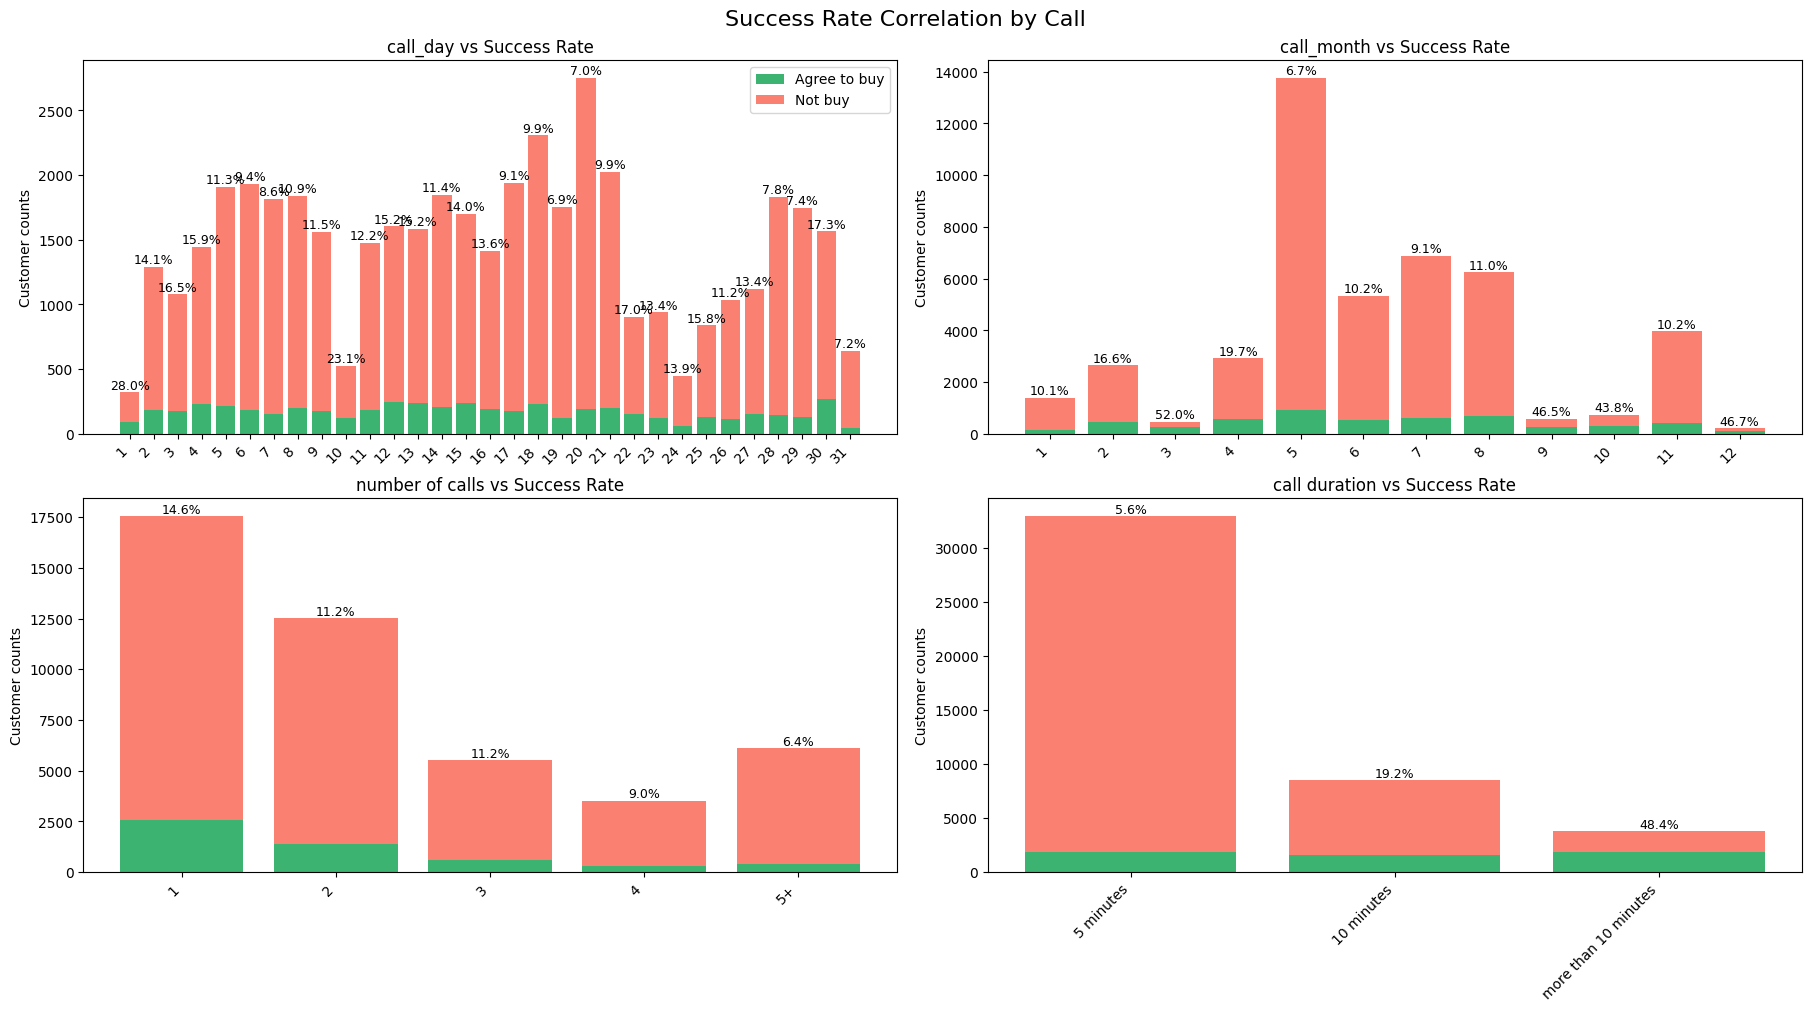

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10), constrained_layout=True)

# plot call day and call month
plot_status_by_category(df, 'call_day', axes[0,0])
plot_status_by_category(df, 'call_month', axes[0,1])

# Plot number of calls
temp_df = df.copy()
bin_edges_call = [0, 1, 2, 3, 4, float('inf')]
bin_labels_call = ['1', '2', '3', '4', '5+']
temp_df['number of calls'] = pd.cut(temp_df['number_of_calls'], bins=bin_edges_call, labels=bin_labels_call, right=True)
number_of_call_analysis = temp_df.groupby('number of calls')['subscription_status'].value_counts(normalize=True).unstack()
plot_status_by_category(temp_df, 'number of calls', axes[1,0])

# Plot call duration
bin_edges_dur = [0, 300, 600, float('inf')]
bin_labels_dur = ['5 minutes', '10 minutes', 'more than 10 minutes']
temp_df['call duration'] = pd.cut(temp_df['call_duration'], bins=bin_edges_dur, labels=bin_labels_dur, right=True)
number_of_call_analysis = temp_df.groupby('call duration')['subscription_status'].value_counts(normalize=True).unstack()
plot_status_by_category(temp_df, 'call duration', axes[1,1])

axes[0,0].legend(loc='upper right')  # Add legend only once if preferred

plt.suptitle('Success Rate Correlation by Call', fontsize=16)
plt.show()

**Findings:**
- **The first day of the month seem to have highest chance of success, at 28%.**
- **September and Decemeber have the highest chance of success, at nearly 47%**, may be at this time of year, customers have more financial to buy term life insurance.
- **The first call has highest chance of succes, at nearly 15%.** The more you call doesn't mean the higher succes chance is, may be customer who denies to buy
will still deny after several calls.
- **The call with more than 10 minutes is more successfull call, with sucess rate at nearly 49%**, which may be mean that when customer is interested, the call duration
is getting longer.

#### **Now, let quickly check correlation of other feature to sucess rate**

In [14]:
# Encode other categorical feature
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns, drop_first=True)

df_encoded.head()

,customer_age,call_day,call_month,call_duration,number_of_calls,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,...,marital_status_single,education_level_secondary,education_level_tertiary,education_level_unknown,contact_method_telephone,contact_method_unknown,previous_campaign_outcome_other,previous_campaign_outcome_success,previous_campaign_outcome_unknown,subscription_status_yes
0,58,5,5,261,1,False,False,False,True,False,...,False,False,True,False,False,True,False,False,True,False
1,44,5,5,151,1,False,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
2,33,5,5,76,1,False,True,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,47,5,5,92,1,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,33,5,5,198,1,False,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False


#### The categorical features, for example job_type has been converted to True/False with many columns, each column represent one job type

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9420\988268365.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='coolwarm')


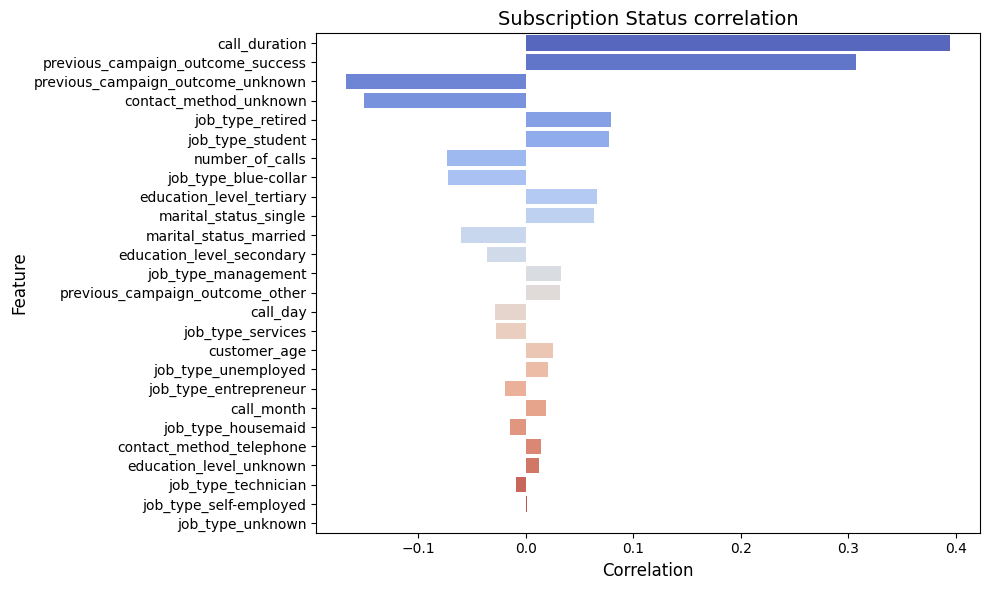

In [15]:
# Calculate correlation matrix
corr_matrix = df_encoded.corr()

# Only choose the subscription_status correlation
target_corr = corr_matrix['subscription_status_yes'].drop('subscription_status_yes')

# Sort by correlation value
target_corr_sorted = target_corr.sort_values(key=abs, ascending=False)

# Show bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette='coolwarm')
plt.title('Subscription Status correlation', fontsize=14)
plt.xlabel('Correlation', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

**Findings**: 
**Similar to the result from stacked graph analysis, the correlation graph also give us the same portrait of customer and success call indicators**, which are:
    
- The succes customer portrait is retired or studenst with tertiary education level and single. Moreover, the customer who agree to buy at
    previous campaign has higher chance to buy again.
- The call duration has positive correlation with sucess rate, which means the longer the call, the higher the success rate is. By contrast, the number of calls has negative correlation, which means the more telesale call for the same customer, the lower the sucess rate is.
The succes call should be the first or second call with long duration.

### **4. Build model (Predictive)**

#### **Question:** Can we build a model to predict the successful call?

In [16]:
# Split target and input variable
X = df_encoded.drop('subscription_status_yes', axis=1)
y = df_encoded['subscription_status_yes']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# GridSearch
models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ['l1', 'l2'],
            "solver": ['liblinear']
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10, None],
            "min_samples_split": [2, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan']
        }
    }
}

In [18]:
# Fit models with different parameter from GridSearch, then print the result
results = []

for name, config in models.items():
    print(f"🔧 Training {name}...")
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"✅ Best {name} accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    results.append((name, acc, grid.best_params_))

🔧 Training LogisticRegression...
✅ Best LogisticRegression accuracy: 0.8991
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.67      0.32      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043

🔧 Training RandomForest...
✅ Best RandomForest accuracy: 0.8994
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      7952
        True       0.64      0.39      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043

🔧 Training KNN...
✅ Best KNN accuracy: 0.8969
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7952
        True       0.65      0.31      0.42      10

In [19]:
# Choose the best model
results.sort(key=lambda x: x[1], reverse=True)

print("\n🔎 Model compare:")
for name, acc, params in results:
    print(f"{name}: Accuracy={acc:.4f} | Best Params={params}")

best_model_name, best_acc, best_params = results[0]
print(f"\n🌟 Best model: {best_model_name} with accuracy {best_acc:.4f}")


🔎 Model compare:
RandomForest: Accuracy=0.8994 | Best Params={'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
LogisticRegression: Accuracy=0.8991 | Best Params={'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
KNN: Accuracy=0.8969 | Best Params={'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

🌟 Best model: RandomForest with accuracy 0.8994


#### **Answer: Model of choice:**
The **RandomForest model** has **highest accuary** at **90.09%** in predicting the chance of customer buying term life insurance.

In [20]:
!pip install pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

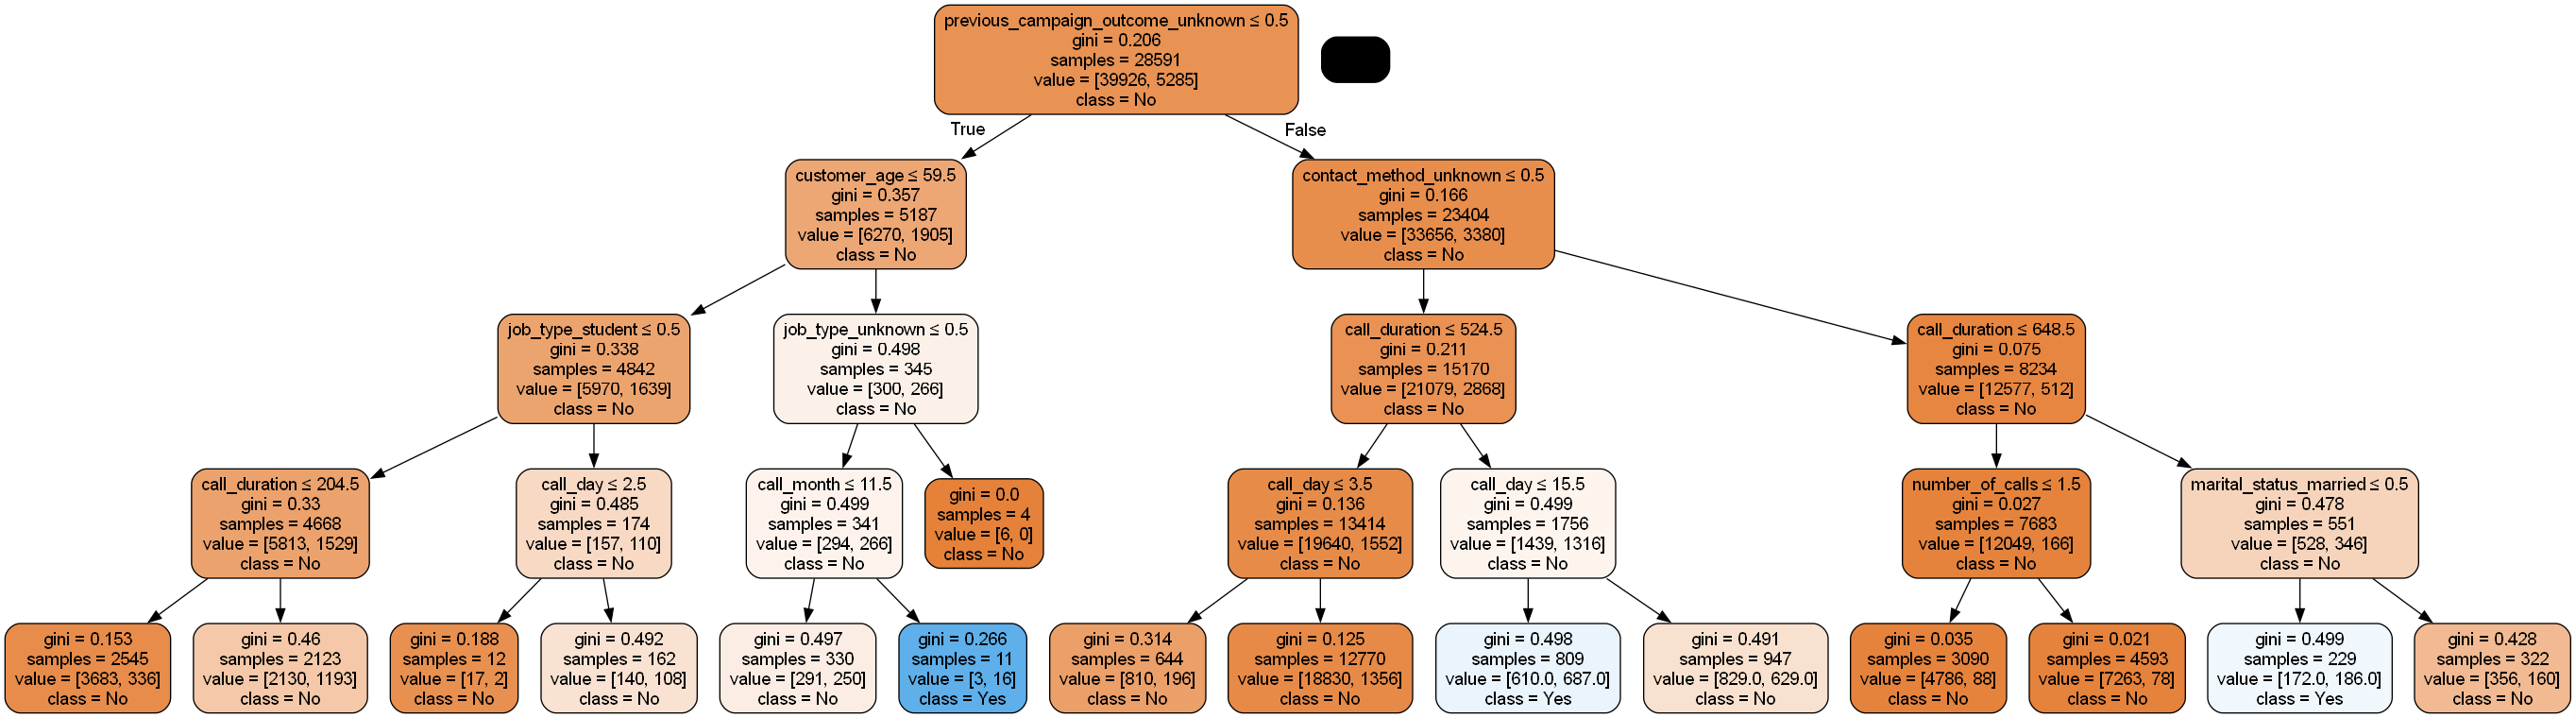

In [21]:
# Train the model on original data (BEFORE scaled)
rf_raw = RandomForestClassifier(
    n_estimators=200,
    max_depth=4,
    min_samples_split=6,
    random_state=42
)
rf_raw.fit(X, y)

# Randomly choose a tree in the forest, usually the 1st tree
estimator = rf_raw.estimators_[0]

# Export the tree
dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### Above is illustration of a random tree in forest (the first tree)